In [1]:
import tensorflow as tf
try: #If running in colab 
    import google.colab
    IN_COLAB = True 
except:
    IN_COLAB = False
if (not tf.__version__.startswith('2')): #Checking if tf 2.0 is installed
    if IN_COLAB: #If running in colab install tf 2.0
        !pip install tensorflow-gpu==2.0.0-alpha0
        !pip install tfp-nightly==0.7.0-dev20190511
    print('Please install tensorflow 2.0 to run this notebook')
print('Tensorflow version: ',tf.__version__, ' running in colab?: ', IN_COLAB)

Tensorflow version:  2.0.0-alpha0  running in colab?:  True


In [0]:
# load required libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation, Dropout
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import optimizers


In [0]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

X_train=x_train / 255 #divide by 255 so that they are in range 0 to 1
X_train=np.reshape(X_train, (X_train.shape[0],32,32,3))
Y_train=tensorflow.keras.utils.to_categorical(y_train,10) # one-hot encoding

X_test=x_test / 255 #divide by 255 so that they are in range 0 to 1
X_test=np.reshape(X_test, (X_test.shape[0],32,32,3))
Y_test=tensorflow.keras.utils.to_categorical(y_test,10) # one-hot encoding



In [0]:
# here you define hyperparameter of the CNN
batch_size = 128
nb_classes = 2  # for the sub data you only have 2 classes
img_rows, img_cols = 32, 32
kernel_size = (3, 3)
input_shape = (img_rows, img_cols, 3)
pool_size = (2, 2)

In [0]:
nb_classes = 10

# define CNN with 2 convolution blocks and 2 fully connected layers
model = Sequential()

model.add(Convolution2D(16,kernel_size,padding='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(16,kernel_size,padding='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Convolution2D(32,kernel_size,padding='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(32,kernel_size,padding='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))


model.add(Flatten())
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# compile model and intitialize weights
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 32)        0

In [7]:
history1=model.fit(X_train, Y_train,validation_data=(X_test,Y_test), batch_size=128,epochs=30,verbose=1)


Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 7s 133us/sample - loss: 1.5953 - accuracy: 0.4146 - val_loss: 1.3214 - val_accuracy: 0.5145
Epoch 2/30
50000/50000 [==============================] - 4s 86us/sample - loss: 1.2137 - accuracy: 0.5637 - val_loss: 1.1157 - val_accuracy: 0.6026
Epoch 3/30
50000/50000 [==============================] - 4s 84us/sample - loss: 1.0438 - accuracy: 0.6287 - val_loss: 1.0169 - val_accuracy: 0.6438
Epoch 4/30
50000/50000 [==============================] - 4s 83us/sample - loss: 0.9254 - accuracy: 0.6729 - val_loss: 1.0078 - val_accuracy: 0.6496
Epoch 5/30
50000/50000 [==============================] - 4s 86us/sample - loss: 0.8446 - accuracy: 0.7008 - val_loss: 0.9262 - val_accuracy: 0.6706
Epoch 6/30
50000/50000 [==============================] - 4s 85us/sample - loss: 0.7790 - accuracy: 0.7254 - val_loss: 0.9946 - val_accuracy: 0.6571
Epoch 7/30
50000/50000 [==============================]

In [0]:
nb_classes = 10

# define CNN with 2 convolution blocks and 2 fully connected layers
model = Sequential()

model.add(Convolution2D(16,kernel_size,padding='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(16,kernel_size,padding='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Convolution2D(32,kernel_size,padding='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(32,kernel_size,padding='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))


model.add(Flatten())
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# compile model and intitialize weights
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
activation_9 (Activation)    (None, 16, 16, 32)       

In [10]:
history2=model.fit(X_train, Y_train,validation_data=(X_test,Y_test), batch_size=128,epochs=30,verbose=1)


Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 5s 94us/sample - loss: 1.8994 - accuracy: 0.2845 - val_loss: 1.4831 - val_accuracy: 0.4512
Epoch 2/30
50000/50000 [==============================] - 4s 85us/sample - loss: 1.5507 - accuracy: 0.4332 - val_loss: 1.3384 - val_accuracy: 0.5145
Epoch 3/30
50000/50000 [==============================] - 4s 86us/sample - loss: 1.3850 - accuracy: 0.4982 - val_loss: 1.1703 - val_accuracy: 0.5813
Epoch 4/30
50000/50000 [==============================] - 4s 86us/sample - loss: 1.2735 - accuracy: 0.5458 - val_loss: 1.1019 - val_accuracy: 0.6094
Epoch 5/30
50000/50000 [==============================] - 4s 85us/sample - loss: 1.1992 - accuracy: 0.5743 - val_loss: 1.0515 - val_accuracy: 0.6298
Epoch 6/30
50000/50000 [==============================] - 4s 85us/sample - loss: 1.1425 - accuracy: 0.5960 - val_loss: 1.0439 - val_accuracy: 0.6369
Epoch 7/30
50000/50000 [==============================] 

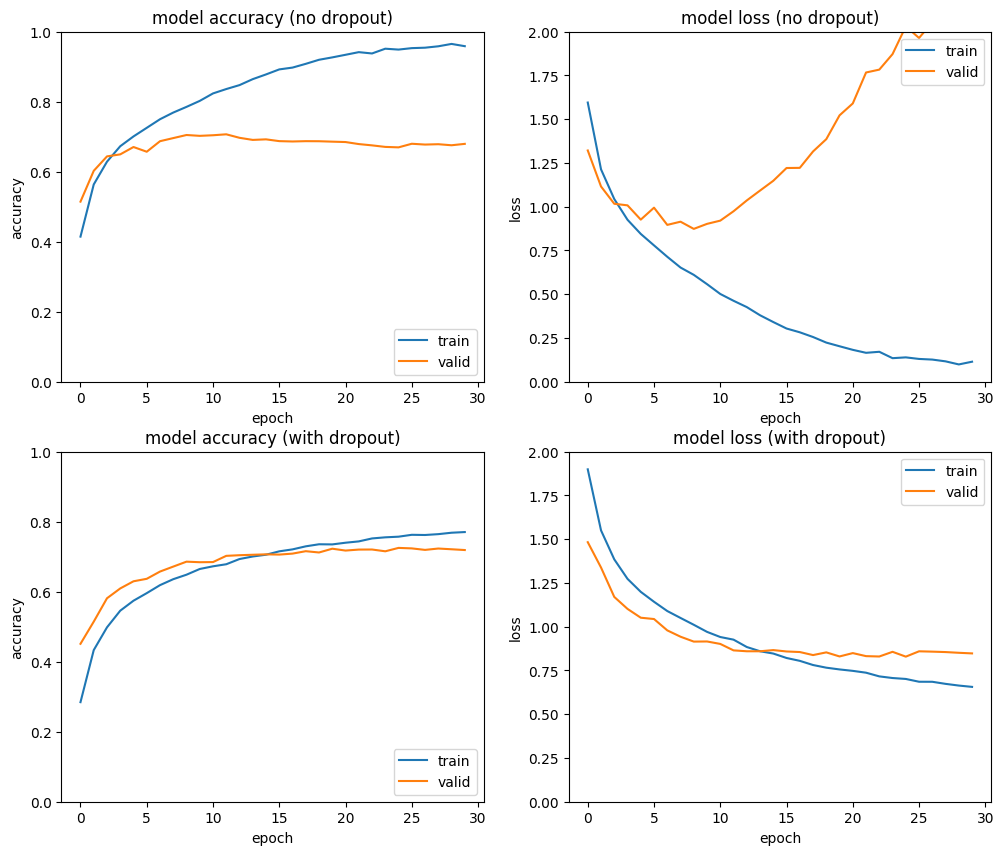

In [11]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.ylim(0, 1)
plt.title('model accuracy (no dropout)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(2,2,2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss (no dropout)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.ylim([0,2])


plt.subplot(2,2,3)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.ylim(0, 1)
plt.title('model accuracy (with dropout)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(2,2,4)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss (with dropout)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.ylim([0,2])
plt.show()